### Some charts based on data in [this LifeHacker article](https://twocents.lifehacker.com/how-to-make-more-money-in-2019-1831844993)

In [20]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn')

In [27]:
data = [{'job': 'data specialist', 'age': 31, 'salary': 43000, 'exp_pct': 60, 'loc': 'Portland, OR'},
        {'job': 'admin asst', 'age': 26, 'salary': 50000, 'exp_pct': 80, 'loc': 'Los Angeles, CA'},
        {'job': 'writer', 'age': 36, 'salary': 100000, 'exp_pct': 75, 'loc': 'Los Angeles, CA'},
        {'job': 'applications engineer', 'age': 31, 'salary': 84000, 'exp_pct': 0, 'loc': 'Shelby Township, MI'},
        {'job': 'writer', 'age': 35, 'salary': 100000, 'exp_pct': 25, 'loc': 'Pasadena, CA'}]

df = pd.DataFrame(data)
df['desc'] = df.apply(lambda r: '{0}\nage: {1}'.format(r.job, r.age), axis=1)
df.head()

,age,exp_pct,job,loc,salary,desc
0,31,60,data specialist,"Portland, OR",43000,data specialist\nage: 31
1,26,80,admin asst,"Los Angeles, CA",50000,admin asst\nage: 26
2,36,75,writer,"Los Angeles, CA",100000,writer\nage: 36
3,31,0,applications engineer,"Shelby Township, MI",84000,applications engineer\nage: 31
4,35,25,writer,"Pasadena, CA",100000,writer\nage: 35


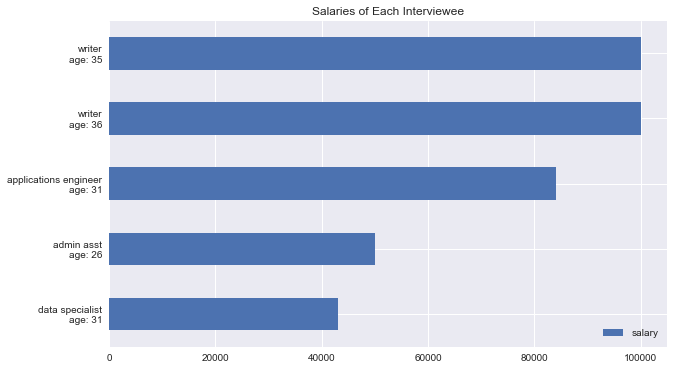

In [28]:
title = 'Salaries of Each Interviewee'
df_sorted = df.sort_values('salary')
ax = df_sorted[['desc', 'salary']].plot.barh(figsize=(10,6), title=title)
_ = ax.set_yticklabels(df_sorted.desc.tolist())

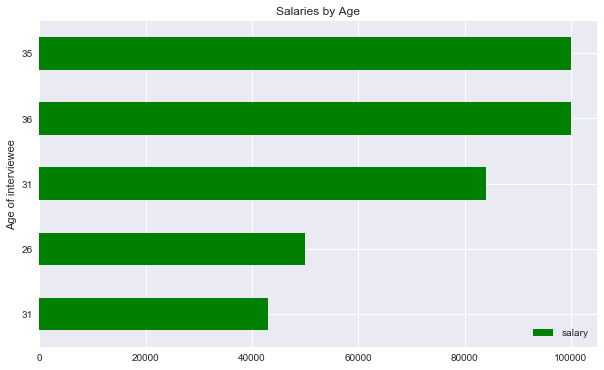

In [29]:
title = 'Salaries by Age'
df_sorted2 = df.sort_values('salary')
df_sorted2['age'] = df_sorted2.age.astype(str)
ax = df_sorted2[['age', 'salary']].plot.barh(figsize=(10,6), title=title, color='g')
_ = ax.set_yticklabels(df_sorted2.age.tolist())
_ = ax.set_ylabel('Age of interviewee')

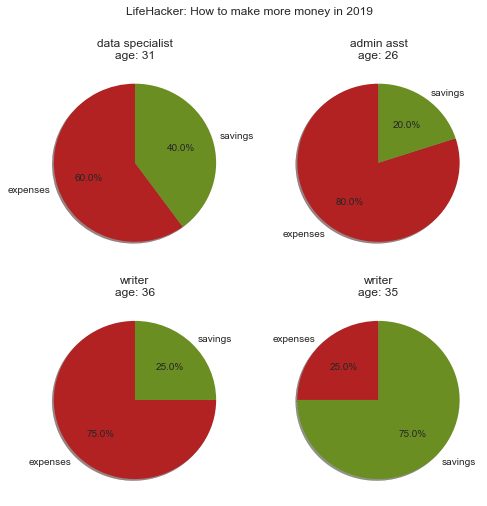

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(8,8))
cnt = 0
for i, r in df_sorted[df_sorted.exp_pct > 0].iterrows():
    if cnt < 2:
        axes[0, cnt].pie([r.exp_pct, 100 - r.exp_pct], shadow=True, startangle=90, 
                         labels=['expenses', 'savings'], autopct='%.1f%%', colors=['firebrick', 'olivedrab'])
        axes[0, cnt].set_title(r.desc)
    else:
        axes[1, cnt-2].pie([r.exp_pct, 100 - r.exp_pct], shadow=True, startangle=90, 
                           labels=['expenses', 'savings'], autopct='%.1f%%', colors=['firebrick', 'olivedrab'])
        axes[1, cnt-2].set_title(r.desc)
    cnt += 1
    
fig.suptitle('LifeHacker: How to make more money in 2019')
plt.show()

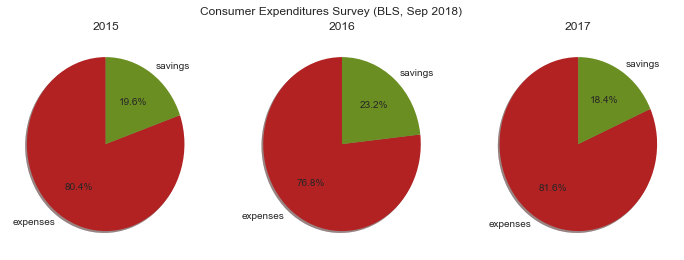

In [31]:
# data from consumer expenditures BLS survey: https://www.bls.gov/news.release/cesan.htm

bls_data = [{'year': '2015', 'avg_income': 69627, 'avg_exp': 55978}, 
            {'year': '2016', 'avg_income': 74664, 'avg_exp': 57311}, 
            {'year': '2017', 'avg_income': 73573, 'avg_exp': 60060}]

df_bls = pd.DataFrame(bls_data)

fig, axes = plt.subplots(1, 3, figsize=(12,4))

for i, r in df_bls.iterrows():
    axes[i].pie([(r.avg_exp / r.avg_income)*100, ((r.avg_income-r.avg_exp)/r.avg_income)*100], 
                     shadow=True, startangle=90, labels=['expenses', 'savings'], autopct='%.1f%%', 
                     colors=['firebrick', 'olivedrab'])
    axes[i].set_title(r.year)
    
fig.suptitle('Consumer Expenditures Survey (BLS, Sep 2018)')
plt.show()